<a href="https://colab.research.google.com/github/christianbammann/introtoML/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem 1**

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, log_loss
)
from sklearn import metrics

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [8]:
X = df.iloc[:, 0:8].values
Y = df.iloc[:, 8].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0
)

In [10]:
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 614
Test samples: 154


In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)
print("Train mean (first 5):", X_train.mean(axis=0)[:5])
print("Train std  (first 5):", X_train.std(axis=0, ddof=0)[:5])

Train mean (first 5): [-3.55307531e-17  7.14231425e-18  1.90039804e-16  5.20756077e-17
  2.89670568e-16]
Train std  (first 5): [1. 1. 1. 1. 1.]


In [12]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [13]:
Y_pred = classifier.predict(X_test)

In [14]:
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0])

In [15]:
print("Predictions (first 10):", Y_pred[:10])
print("Actual (first 10):     ", Y_test[:10])

Predictions (first 10): [1 0 0 1 0 0 1 1 0 0]
Actual (first 10):      [1 0 0 1 0 0 1 1 0 0]


In [16]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

In [17]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 427.9555555555555, 'Predicted Label')

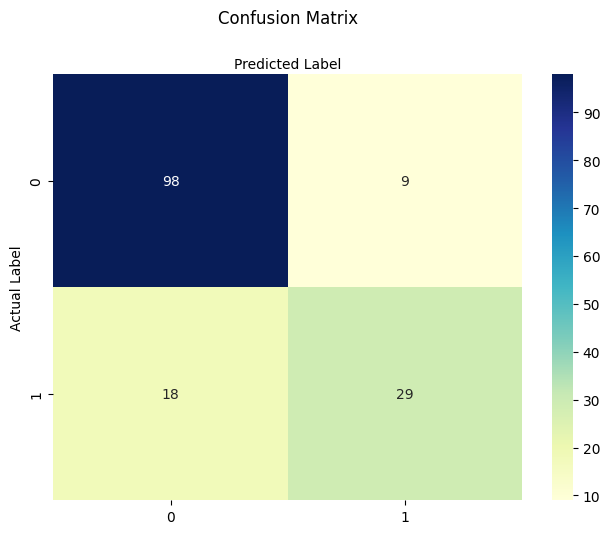

In [20]:
# Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
# Here, you will visualize the confusion matrix using Heatmap.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [21]:
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

F1 Score: 0.6823529411764706


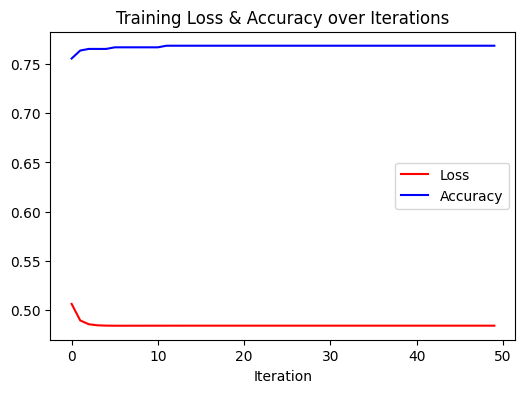

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score

# Train using SGD to track metrics easily
n_epochs = 50
sgd = SGDClassifier(loss="log_loss", max_iter=1, learning_rate="constant",
                    eta0=0.01, random_state=0, warm_start=True)

losses, accuracies = [], []

for _ in range(n_epochs):
    sgd.fit(X_train, Y_train)
    probs = sgd.predict_proba(X_train)[:, 1]
    preds = (probs >= 0.5).astype(int)
    losses.append(log_loss(Y_train, probs))
    accuracies.append(accuracy_score(Y_train, preds))

# Plot both curves
plt.figure(figsize=(6,4))
plt.plot(losses, label="Loss", color='red')
plt.plot(accuracies, label="Accuracy", color='blue')
plt.xlabel("Iteration")
plt.title("Training Loss & Accuracy over Iterations")
plt.legend()
plt.show()



### **Problem 2**

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [84]:
cdata = load_breast_cancer()

In [85]:
dataset = pd.DataFrame(cdata.data, columns=cdata.feature_names)
dataset['target'] = cdata.target

In [86]:
X = dataset.iloc[:, 0:30].values
Y = dataset.iloc[:, 30].values

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0, stratify=Y
)

In [89]:
print("Training samples:", X_train.shape[0])
print("Test samples    :", X_test.shape[0])
print("Positive rate (train):", Y_train.mean())
print("Positive rate (test) :", Y_test.mean())

Training samples: 455
Test samples    : 114
Positive rate (train): 0.6263736263736264
Positive rate (test) : 0.631578947368421


In [90]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)
print("Train mean (first 5):", X_train.mean(axis=0)[:5])
print("Train std  (first 5):", X_train.std(axis=0, ddof=0)[:5])

Train mean (first 5): [-2.86803548e-15 -2.99491811e-15  2.42101821e-15  8.36937357e-16
  1.17024827e-15]
Train std  (first 5): [1. 1. 1. 1. 1.]


In [102]:
#classifier = LogisticRegression(random_state=0)
classifier = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=1000, random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=0)

In [92]:
Y_pred = classifier.predict(X_test)

In [93]:
Y_pred[0:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [94]:
print("Predictions (first 10):", Y_pred[:10])
print("Actual (first 10):     ", Y_test[:10])

Predictions (first 10): [0 0 0 1 0 1 0 1 1 0]
Actual (first 10):      [0 0 0 1 0 1 0 1 1 0]


In [95]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[38,  4],
       [ 1, 71]])

In [97]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9466666666666667
Recall: 0.9861111111111112


Text(0.5, 427.9555555555555, 'Predicted Label')

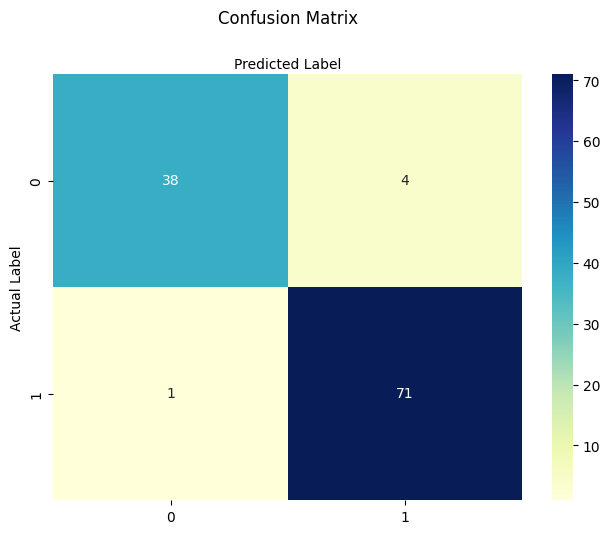

In [98]:
# Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
# Here, you will visualize the confusion matrix using Heatmap.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [99]:
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

F1 Score: 0.9659863945578231


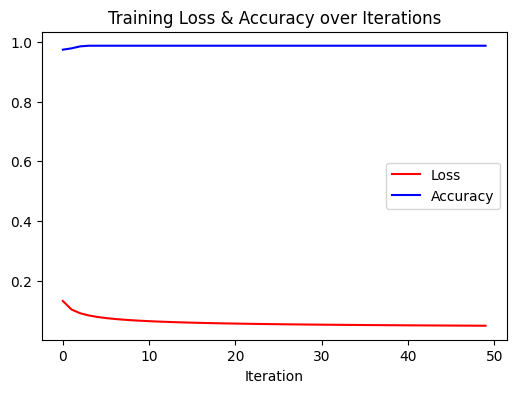

In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score

# Train using SGD to track metrics easily
n_epochs = 50
sgd = SGDClassifier(loss="log_loss", max_iter=1, learning_rate="constant",
                    eta0=0.01, random_state=0, warm_start=True)

losses, accuracies = [], []

for _ in range(n_epochs):
    sgd.fit(X_train, Y_train)
    probs = sgd.predict_proba(X_train)[:, 1]
    preds = (probs >= 0.5).astype(int)
    losses.append(log_loss(Y_train, probs))
    accuracies.append(accuracy_score(Y_train, preds))

# Plot both curves
plt.figure(figsize=(6,4))
plt.plot(losses, label="Loss", color='red')
plt.plot(accuracies, label="Accuracy", color='blue')
plt.xlabel("Iteration")
plt.title("Training Loss & Accuracy over Iterations")
plt.legend()
plt.show()